# Exploratory data analysis

In [1]:
from torchvision.transforms import Resize, Compose, Grayscale
from datasets.pneumonia_dataset import PneumoniaDataset
import matplotlib.pyplot as plt
from models.cnns import get_pretrained_rn_18, SmallCNN
from train_utils import train
import torch
from torch.utils.data import DataLoader

### Loading data

In [2]:
resize_transform = Resize((224,224)) # the images are large and have differing shapes
train_dataset = PneumoniaDataset("data/chest_xray/train", resize_transform, use_rgb=False)
val_dataset = PneumoniaDataset("data/chest_xray/val", resize_transform, use_rgb=False)

/home/lrabuzin/.conda/envs/ML4HC/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


### Visualising image examples

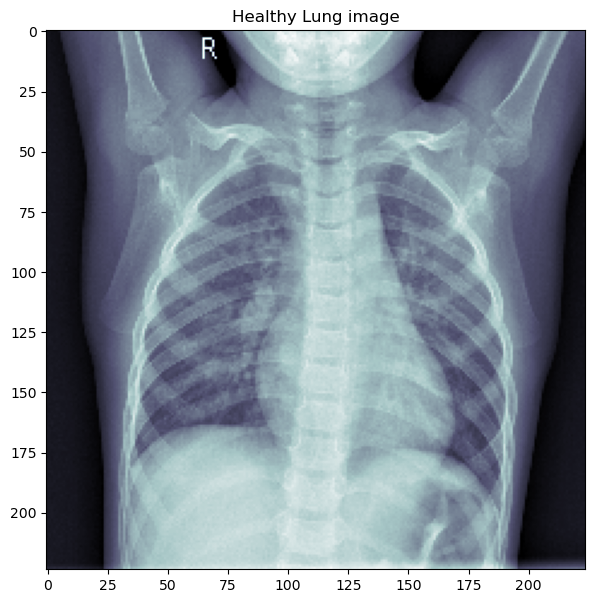

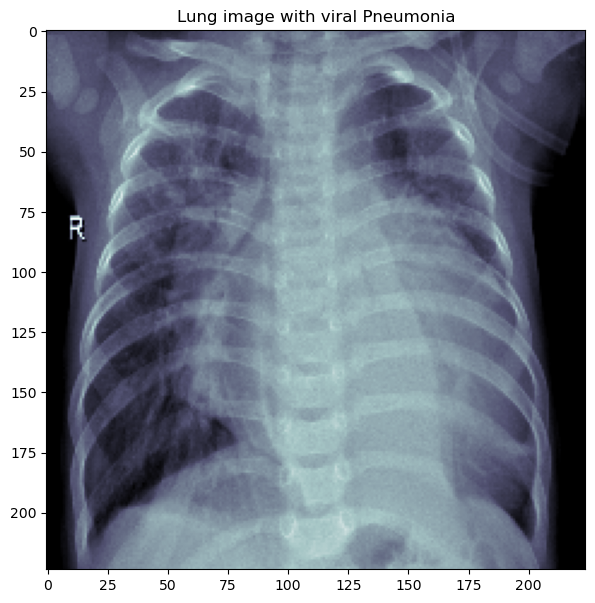

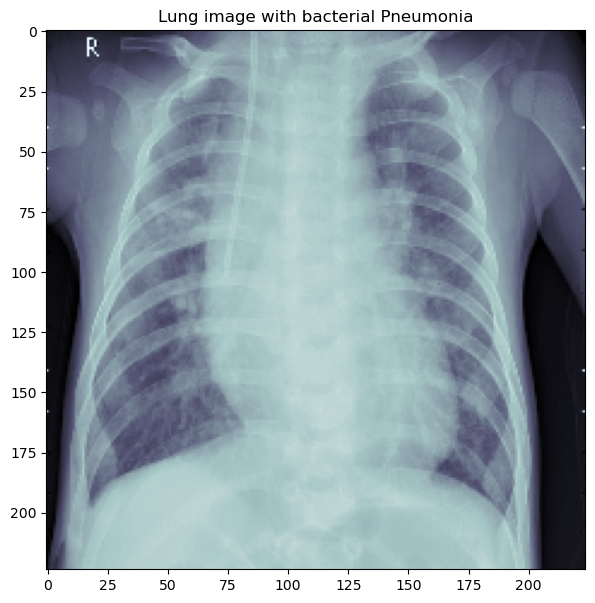

In [3]:
plt.figure(figsize = (7,7))
plt.imshow(train_dataset[0][0][0], cmap='bone')
plt.title("Healthy Lung image")

plt.figure(figsize = (7,7))
plt.imshow(train_dataset[-40][0][0], cmap='bone')
plt.title("Lung image with viral Pneumonia")

plt.figure(figsize = (7,7))
plt.imshow(train_dataset[-71][0][0], cmap='bone')
plt.title("Lung image with bacterial Pneumonia")
print()

### Visualising class counts

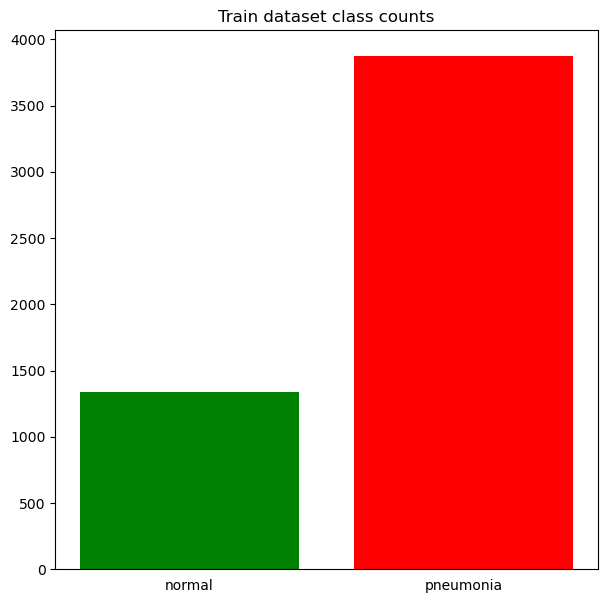

In [4]:
train_dataset_class_counts = [train_dataset.labels.count(class_label) for class_label in range(2)]

plt.figure(figsize = (7,7))
plt.bar(["normal", "pneumonia"], train_dataset_class_counts, color=['green', 'red'])
plt.tick_params(bottom = False)
plt.title("Train dataset class counts")
print()

### Preprocessing
Preprocessing is done in the `PneumoniaDataset` class. Namely the preprocessing consists of reshaping the images so that all of them have the same size and shape. Also, the luminosity values of the image are rescaled to the range [0,1] in order for the model to be able to learn more easily. *maybe try normalisation of values*

# Model
As our cnn model for creating prediction, we use a pre-trained resnet18 model that we will fine-tune on our dataset. We chose to go with a pretrained model to achieve higher accuracy and reduce training time. We chose resnet18 specifically over larger models because the dataset at hand is relatively small and we have only 2 classes

In [57]:
model = SmallCNN()

### Training

In [58]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_args = {
    "epochs": 30, 
    "device": device,
    "scheduler": "ReduceLROnPlateau",
    "optimizer_args": { "lr": 0.001},
    "verbose": True,
    "batch_size": 256
}

In [59]:
trainloader = DataLoader(train_dataset, train_args["batch_size"], shuffle=True)
valloader = DataLoader(val_dataset, train_args["batch_size"], shuffle=False)

In [55]:
print(train_args["device"])

cuda


In [60]:
results = train(model, trainloader, valloader, train_args)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 0 | 	 train loss:  0.0025, train roc auc: 0.5078, train accuracy: 0.6773, train precision: 0.7464, train recall: 0.8568, train f1 score: 0.7978 |               
	 val loss: 0.0512, val roc auc: 0.5000, val accuracy: 0.5000, val precision: 0.5000, val recall: 1.0000, val f1 score: 0.6667 


  3%|▎         | 1/30 [00:02<01:20,  2.76s/it]

Epoch 1 | 	 train loss:  0.0023, train roc auc: 0.5000, train accuracy: 0.7429, train precision: 0.7429, train recall: 1.0000, train f1 score: 0.8525 |               
	 val loss: 0.0520, val roc auc: 0.5000, val accuracy: 0.5000, val precision: 0.5000, val recall: 1.0000, val f1 score: 0.6667 


  7%|▋         | 2/30 [00:05<01:15,  2.70s/it]

Epoch 2 | 	 train loss:  0.0023, train roc auc: 0.5000, train accuracy: 0.7429, train precision: 0.7429, train recall: 1.0000, train f1 score: 0.8525 |               
	 val loss: 0.0488, val roc auc: 0.5000, val accuracy: 0.5000, val precision: 0.5000, val recall: 1.0000, val f1 score: 0.6667 


 10%|█         | 3/30 [00:08<01:13,  2.72s/it]

Epoch 3 | 	 train loss:  0.0022, train roc auc: 0.5000, train accuracy: 0.7429, train precision: 0.7429, train recall: 1.0000, train f1 score: 0.8525 |               
	 val loss: 0.0495, val roc auc: 0.5000, val accuracy: 0.5000, val precision: 0.5000, val recall: 1.0000, val f1 score: 0.6667 


 13%|█▎        | 4/30 [00:10<01:10,  2.72s/it]

Epoch 4 | 	 train loss:  0.0016, train roc auc: 0.6158, train accuracy: 0.7958, train precision: 0.7906, train recall: 0.9863, train f1 score: 0.8777 |               
	 val loss: 0.1221, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 17%|█▋        | 5/30 [00:13<01:08,  2.74s/it]

Epoch 5 | 	 train loss:  0.0011, train roc auc: 0.8463, train accuracy: 0.8857, train precision: 0.9194, train recall: 0.9275, train f1 score: 0.9234 |               
	 val loss: 0.0776, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 20%|██        | 6/30 [00:16<01:05,  2.75s/it]

Epoch 6 | 	 train loss:  0.0008, train roc auc: 0.8879, train accuracy: 0.9172, train precision: 0.9408, train recall: 0.9481, train f1 score: 0.9445 |               
	 val loss: 0.0907, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 23%|██▎       | 7/30 [00:19<01:03,  2.74s/it]

Epoch 7 | 	 train loss:  0.0008, train roc auc: 0.8897, train accuracy: 0.9162, train precision: 0.9430, train recall: 0.9443, train f1 score: 0.9436 |               
	 val loss: 0.0717, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 27%|██▋       | 8/30 [00:21<01:00,  2.75s/it]

Epoch 8 | 	 train loss:  0.0008, train roc auc: 0.8786, train accuracy: 0.9145, train precision: 0.9337, train recall: 0.9525, train f1 score: 0.9430 |               
	 val loss: 0.0584, val roc auc: 0.6250, val accuracy: 0.6250, val precision: 0.5714, val recall: 1.0000, val f1 score: 0.7273 


 30%|███       | 9/30 [00:24<00:57,  2.76s/it]

Epoch 9 | 	 train loss:  0.0006, train roc auc: 0.9206, train accuracy: 0.9388, train precision: 0.9594, train recall: 0.9582, train f1 score: 0.9588 |               
	 val loss: 0.0810, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 33%|███▎      | 10/30 [00:27<00:55,  2.77s/it]

Epoch 10 | 	 train loss:  0.0006, train roc auc: 0.9228, train accuracy: 0.9429, train precision: 0.9592, train recall: 0.9641, train f1 score: 0.9616 |               
	 val loss: 0.0702, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 37%|███▋      | 11/30 [00:30<00:52,  2.78s/it]

Epoch 11 | 	 train loss:  0.0005, train roc auc: 0.9330, train accuracy: 0.9490, train precision: 0.9654, train recall: 0.9659, train f1 score: 0.9657 |               
	 val loss: 0.0792, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 40%|████      | 12/30 [00:33<00:50,  2.80s/it]

Epoch 12 | 	 train loss:  0.0006, train roc auc: 0.9214, train accuracy: 0.9427, train precision: 0.9580, train recall: 0.9652, train f1 score: 0.9616 |               
	 val loss: 0.0420, val roc auc: 0.7500, val accuracy: 0.7500, val precision: 0.6667, val recall: 1.0000, val f1 score: 0.8000 


 43%|████▎     | 13/30 [00:36<00:49,  2.89s/it]

Epoch 13 | 	 train loss:  0.0007, train roc auc: 0.9157, train accuracy: 0.9331, train precision: 0.9582, train recall: 0.9515, train f1 score: 0.9548 |               
	 val loss: 0.0916, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 47%|████▋     | 14/30 [00:44<01:10,  4.40s/it]

Epoch 14 | 	 train loss:  0.0005, train roc auc: 0.9251, train accuracy: 0.9456, train precision: 0.9598, train recall: 0.9672, train f1 score: 0.9635 |               
	 val loss: 0.0554, val roc auc: 0.7500, val accuracy: 0.7500, val precision: 0.6667, val recall: 1.0000, val f1 score: 0.8000 


 50%|█████     | 15/30 [00:57<01:44,  6.97s/it]

Epoch 15 | 	 train loss:  0.0005, train roc auc: 0.9384, train accuracy: 0.9542, train precision: 0.9676, train recall: 0.9708, train f1 score: 0.9692 |               
	 val loss: 0.0800, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 53%|█████▎    | 16/30 [01:10<02:03,  8.82s/it]

Epoch 16 | 	 train loss:  0.0004, train roc auc: 0.9474, train accuracy: 0.9599, train precision: 0.9729, train recall: 0.9732, train f1 score: 0.9730 |               
	 val loss: 0.0598, val roc auc: 0.6875, val accuracy: 0.6875, val precision: 0.6154, val recall: 1.0000, val f1 score: 0.7619 


 57%|█████▋    | 17/30 [01:23<02:13, 10.25s/it]

Epoch 17 | 	 train loss:  0.0004, train roc auc: 0.9536, train accuracy: 0.9655, train precision: 0.9755, train recall: 0.9781, train f1 score: 0.9768 |               
	 val loss: 0.0447, val roc auc: 0.7500, val accuracy: 0.7500, val precision: 0.6667, val recall: 1.0000, val f1 score: 0.8000 


 60%|██████    | 18/30 [01:37<02:15, 11.29s/it]

Epoch 18 | 	 train loss:  0.0004, train roc auc: 0.9574, train accuracy: 0.9668, train precision: 0.9785, train recall: 0.9768, train f1 score: 0.9777 |               
	 val loss: 0.0527, val roc auc: 0.6875, val accuracy: 0.6875, val precision: 0.6154, val recall: 1.0000, val f1 score: 0.7619 


 63%|██████▎   | 19/30 [01:51<02:12, 12.06s/it]

Epoch 19 | 	 train loss:  0.0003, train roc auc: 0.9571, train accuracy: 0.9666, train precision: 0.9783, train recall: 0.9768, train f1 score: 0.9775 |               
	 val loss: 0.0668, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 67%|██████▋   | 20/30 [02:04<02:04, 12.45s/it]

Epoch 20 | 	 train loss:  0.0003, train roc auc: 0.9605, train accuracy: 0.9695, train precision: 0.9799, train recall: 0.9791, train f1 score: 0.9795 |               
	 val loss: 0.0543, val roc auc: 0.6875, val accuracy: 0.6875, val precision: 0.6154, val recall: 1.0000, val f1 score: 0.7619 


 70%|███████   | 21/30 [02:17<01:54, 12.68s/it]

Epoch 21 | 	 train loss:  0.0003, train roc auc: 0.9592, train accuracy: 0.9688, train precision: 0.9791, train recall: 0.9788, train f1 score: 0.9790 |               
	 val loss: 0.0367, val roc auc: 0.8125, val accuracy: 0.8125, val precision: 0.7273, val recall: 1.0000, val f1 score: 0.8421 


 73%|███████▎  | 22/30 [02:31<01:44, 13.02s/it]

Epoch 22 | 	 train loss:  0.0004, train roc auc: 0.9544, train accuracy: 0.9634, train precision: 0.9777, train recall: 0.9729, train f1 score: 0.9753 |               
	 val loss: 0.1002, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 77%|███████▋  | 23/30 [02:45<01:32, 13.16s/it]

Epoch 23 | 	 train loss:  0.0004, train roc auc: 0.9508, train accuracy: 0.9645, train precision: 0.9733, train recall: 0.9791, train f1 score: 0.9762 |               
	 val loss: 0.0450, val roc auc: 0.7500, val accuracy: 0.7500, val precision: 0.6667, val recall: 1.0000, val f1 score: 0.8000 


 80%|████████  | 24/30 [02:58<01:18, 13.15s/it]

Epoch 24 | 	 train loss:  0.0003, train roc auc: 0.9617, train accuracy: 0.9711, train precision: 0.9801, train recall: 0.9809, train f1 score: 0.9805 |               
	 val loss: 0.0841, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 83%|████████▎ | 25/30 [03:11<01:06, 13.31s/it]

Epoch 25 | 	 train loss:  0.0003, train roc auc: 0.9655, train accuracy: 0.9745, train precision: 0.9817, train recall: 0.9840, train f1 score: 0.9829 |               
	 val loss: 0.0398, val roc auc: 0.7500, val accuracy: 0.7500, val precision: 0.6667, val recall: 1.0000, val f1 score: 0.8000 


 87%|████████▋ | 26/30 [03:25<00:53, 13.40s/it]

Epoch 26 | 	 train loss:  0.0003, train roc auc: 0.9672, train accuracy: 0.9745, train precision: 0.9835, train recall: 0.9822, train f1 score: 0.9828 |               
	 val loss: 0.0714, val roc auc: 0.5625, val accuracy: 0.5625, val precision: 0.5333, val recall: 1.0000, val f1 score: 0.6957 


 90%|█████████ | 27/30 [03:38<00:40, 13.34s/it]

Epoch 27 | 	 train loss:  0.0003, train roc auc: 0.9685, train accuracy: 0.9760, train precision: 0.9837, train recall: 0.9840, train f1 score: 0.9839 |               
	 val loss: 0.0570, val roc auc: 0.6875, val accuracy: 0.6875, val precision: 0.6154, val recall: 1.0000, val f1 score: 0.7619 


 93%|█████████▎| 28/30 [03:52<00:26, 13.49s/it]

Epoch 28 | 	 train loss:  0.0002, train roc auc: 0.9719, train accuracy: 0.9778, train precision: 0.9860, train recall: 0.9840, train f1 score: 0.9850 |               
	 val loss: 0.0583, val roc auc: 0.6875, val accuracy: 0.6875, val precision: 0.6154, val recall: 1.0000, val f1 score: 0.7619 


 97%|█████████▋| 29/30 [04:06<00:13, 13.48s/it]

Epoch 29 | 	 train loss:  0.0002, train roc auc: 0.9725, train accuracy: 0.9791, train precision: 0.9858, train recall: 0.9861, train f1 score: 0.9859 |               
	 val loss: 0.0636, val roc auc: 0.6875, val accuracy: 0.6875, val precision: 0.6154, val recall: 1.0000, val f1 score: 0.7619 


100%|██████████| 30/30 [04:19<00:00,  8.64s/it]

Best model 21 tensor(0.0367, device='cuda:0') 0.8125


In [61]:
from train_utils import validate
test_dataset = PneumoniaDataset("data/chest_xray/test", resize_transform, use_rgb=False)
testloader = DataLoader(test_dataset, batch_size=train_args["batch_size"], shuffle=False)

/home/lrabuzin/.conda/envs/ML4HC/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [62]:
test_stats = validate(results["model"], testloader, train_args)
print(f"Test results -> mce: {test_stats[0]}, roc auc: {test_stats[1]}, accuracy: {test_stats[2]}, precision: {test_stats[3]}, recall:{test_stats[4]}, f1: {test_stats[5]}")

Test results -> mce: 0.0020639561116695404, roc auc: 0.779059829059829, accuracy: 0.8285256410256411, precision: 0.7954070981210856, recall:0.9769230769230769, f1: 0.8768699654775605


# Integrated gradients

In [112]:
def integrated_gradients(model, input, n_iter):
    """
    Expects batched input a.k.a. input of shape (1, 3, H, W)
    """
    model.cpu()
    baseline = torch.zeros(input.shape)
    input = input.requires_grad_()
    gradient_sum = torch.zeros(input.shape)
    for k in range(1, n_iter+1):
        model.zero_grad()
        kth_path_image = baseline + k/n_iter * (input - baseline)
        output = model(kth_path_image)
        gradients = torch.autograd.grad(outputs=output, inputs=input, retain_graph=True)[0]
        gradient_sum += gradients
    return (input - baseline) * gradient_sum * (1/n_iter)

In [145]:
def visualise_attribution_map(attribution, input, attribution_mul = 0.7, input_mul = 0.3):

    root_img = input[0].detach().permute([1,2,0]).numpy()

    ig = attribution[0]
    green_mask = ig > 0
    red_mask = ig < 0
    green = torch.clone(ig).detach()
    red = torch.clone(ig).detach()
    green[red_mask] = 0
    red[green_mask] = 0

    green = green[0]
    red = red[0]

    red = torch.abs(red)

    max_val = max(green.max(), red.max())

    green = green/max_val
    red = red/max_val
    blue = torch.zeros(red.shape)

    color_mask = torch.stack([red, green, blue])

    return attribution_mul*color_mask.permute([1,2,0]).numpy() + input_mul*root_img


In [ ]:
model.eval()

Model prediction: 0.0033916186075657606


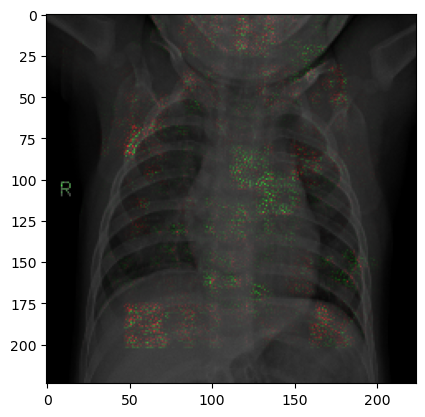

In [150]:
input = train_dataset[220][0].unsqueeze(0).requires_grad_(True)
print(f"Model prediction: {model(input).item()}")
attribution = integrated_gradients(model, input, 500)
plt.imshow(visualise_attribution_map(attribution, input))

# Data Randomization Test

In [ ]:
permuted_model = SmallCNN()

In [ ]:
permuted_train_ds = PneumoniaDataset("data/chest_xray/train", resize_transform, use_rgb=False)
permuted_val_ds = PneumoniaDataset("data/chest_xray/val", resize_transform, use_rgb=False)
permuted_test_ds = PneumoniaDataset("data/chest_xray/test", resize_transform, use_rgb=False)

